In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from greenScreenLAB import removeGreenBackground, removeGreenEdge, mask_alpha
from gaussianBlur import gaussian_blur

In [2]:
def display_images(images):
  fig, axes = plt.subplots(1, len(images), figsize=(10, 4))
  axes = np.array(axes)
  for (ax, image) in zip(axes.reshape(-1), images):
    ax.imshow(image)
    ax.axis('off')

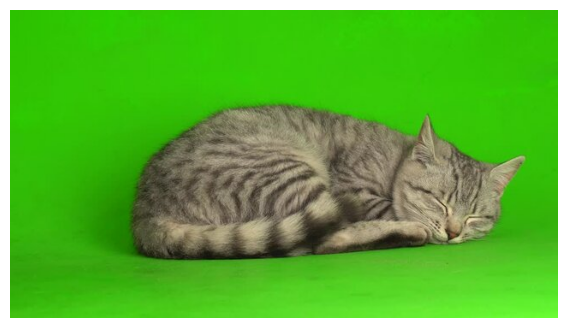

In [3]:
image = cv2.imread('images/greenscreen.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_images([image])

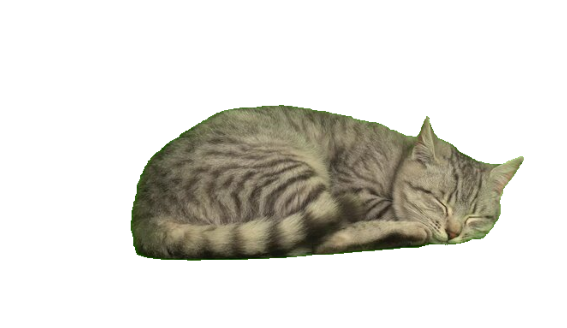

In [4]:
removed_bg, mask = removeGreenBackground(image)
display_images([removed_bg])

In [5]:
slider = widgets.IntSlider(
  value=0,
  min=0,
  max=255,
  step=1,
  description='Threshold:',
  disabled=False,
  continuous_update=True,
  orientation='horizontal',
  readout=True,
  readout_format='d'
)

output_plot = widgets.Output()

def on_value_change(change):
  global removed_edge
  global final_mask
  result, border_mask, final_mask = removeGreenEdge(removed_bg, change['new'], mask)
  removed_edge = result

  display_images([result, border_mask])

  with output_plot:
    output_plot.clear_output(wait=True)
    plt.show()

slider.observe(on_value_change, names='value')

display(slider, output_plot)

IntSlider(value=0, description='Threshold:', max=255)

Output()